In [2]:
import pandas as pd
import numpy as np
from datetime import date, time, datetime

C:\Users\emanu\AppData\Local\Temp\ipykernel_17536\2227464155.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### 231. The Python datetime Module

In [3]:
date_A = date(2022,4,21)

In [4]:
date_A.year

2022

In [5]:
date_A.day

21

In [6]:
date_A.isoformat()

'2022-04-21'

In [7]:
time_A = time(second=9)

In [8]:
time(minute=30).isoformat()

'00:30:00'

In [9]:
time_A = time(23,54,21)

In [10]:
time_A.isoformat()

'23:54:21'

In [11]:
datetime_A = datetime(2022,4,21,23,54,21,323423)

In [12]:
print(datetime_A.microsecond)

323423


#### 232. Parsing Dates From Text

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [13]:
dt_B = datetime.strptime('2019-10-31','%Y-%m-%d')
dt_B.isoformat()

'2019-10-31T00:00:00'

In [14]:
try_this = 'jan 20 2020 4pm'

datetime.strptime(try_this,'%b %d %Y %I%p').isoformat()

'2020-01-20T16:00:00'

#### 233. Even Better: dateutil

In [15]:
!pip show python-dateutil

Name: python-dateutil
Version: 2.8.2
Summary: Extensions to the standard Python datetime module
Home-page: https://github.com/dateutil/dateutil
Author: Gustavo Niemeyer
Author-email: gustavo@niemeyer.net
License: Dual License
Location: C:\Users\emanu\AppData\Roaming\Python\Python312\site-packages
Requires: six
Required-by: jupyter_client, matplotlib, pandas


In [16]:
from dateutil import parser

In [17]:
parser.parse('jan 21st 1990')

datetime.datetime(1990, 1, 21, 0, 0)

In [18]:
parser.parse('22 april 2068 at 4pm and 17 minutes;; 20 seconds')

datetime.datetime(2068, 4, 22, 16, 17, 20)

#### 234. From Datetime to String

In [19]:
dt = datetime.now()
dt

datetime.datetime(2024, 2, 21, 19, 18, 17, 431499)

In [20]:
dt.strftime('Year %Y; Month: %m; Day: %d')

'Year 2024; Month: 02; Day: 21'

In [21]:
dt.strftime('%c')

'Wed Feb 21 19:18:17 2024'

In [22]:
#an alternative approach:
"My date is {:%c}".format(dt)

'My date is Wed Feb 21 19:18:17 2024'

#### 235. Perdormant Datetimes Wiht Numpy

In [23]:
a = np.datetime64('2020-03-04')
b = np.datetime64(datetime.now())

In [24]:
b + 10

numpy.datetime64('2024-02-21T19:18:17.460149')

In [25]:
a + 10

numpy.datetime64('2020-03-14')

In [26]:
np.datetime64(b,'D') + 10

numpy.datetime64('2024-03-02')

In [27]:
# vectorize ops
dates = np.array([
    '2019-02-20',
    '2019-02-10',
    '2019-04-15'
],dtype=np.datetime64)

In [28]:
dates - 10

array(['2019-02-10', '2019-01-31', '2019-04-05'], dtype='datetime64[D]')

In [29]:
# ... what about business day?
print(dates)

np.busday_offset(dates,-10,'backward')

['2019-02-20' '2019-02-10' '2019-04-15']


array(['2019-02-06', '2019-01-25', '2019-04-01'], dtype='datetime64[D]')

#### 236. The Pandas Timestamp

In [30]:
pd.Timestamp("4th of July 1776")

Timestamp('1776-07-04 00:00:00')

In [31]:
pd.Timestamp("4/7/1776")

Timestamp('1776-04-07 00:00:00')

In [32]:
pdts = pd.to_datetime('4/7/1776',dayfirst = True)

In [33]:
pdts.day_name()

'Thursday'

In [34]:
pdts.days_in_month

31

In [35]:
pdts.isocalendar()

datetime.IsoCalendarDate(year=1776, week=27, weekday=4)

#### 237. Our Dataset: Brent Prices

https://andybek.com/pandas-oil

In [36]:
oil_url = 'https://andybek.com/pandas-oil'

brent = pd.read_csv(oil_url)

In [37]:
brent

,Date,Price
0,04-Jan-00,23.95
1,05-Jan-00,23.72
2,06-Jan-00,23.55
3,07-Jan-00,23.35
4,10-Jan-00,22.77
...,...,...
5011,24-Sep-19,64.13
5012,25-Sep-19,62.41
5013,26-Sep-19,62.08
5014,27-Sep-19,62.48


In [38]:
brent.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5016 non-null   object 
 1   Price   5016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 323.4 KB


In [39]:
# brent['Date'] = pd.to_datetime(brent['Date'], format='%Y-%m-%d')
brent['Date'] = pd.to_datetime(brent['Date'], format='%d-%b-%y')


In [40]:
brent.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5016 non-null   datetime64[ns]
 1   Price   5016 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 78.5 KB


In [41]:
brent.set_index('Date',inplace=True)

In [42]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [43]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

#### 239. A Cool Shortcut: read_csv() With parse_dates

In [44]:
brent2 = pd.read_csv(oil_url,index_col=0,parse_dates = True)

C:\Users\emanu\AppData\Local\Temp\ipykernel_17536\114372010.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent2 = pd.read_csv(oil_url,index_col=0,parse_dates = True)


In [45]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

#### 240.Indexing Dates

In [46]:
brent.loc['2019-01'].count()

Price    22
dtype: int64

In [47]:
brent.loc['2019-01':'2019-02-15'].count()

Price    33
dtype: int64

In [48]:
# this is only when in the index we have a datetime

#### 241. Skill Challenge

##### Using the brent time series, create a shorter dataframe that only contains the dates from 1 December 2015 to 31 March 2016

In [49]:
brent.loc['2015-12':'2016-03']

,Price
Date,
2015-12-01,42.97
2015-12-02,41.92
2015-12-03,42.00
2015-12-04,41.44
2015-12-07,39.69
...,...
2016-03-24,38.33
2016-03-28,38.33
2016-03-29,36.75


##### Repeat the above, but this time using a partial string indexing instead of specifying full dates. What was the standard deviation of prices during

In [50]:
brent.loc['2015-12':'2016-03'].std()

Price    3.990123
dtype: float64

##### Was the mean price from February 2018 greater or less than the median price from March 2017?

In [51]:
brent.loc['2018-02'].mean() > brent.loc['2017-03'].median()

Price    True
dtype: bool

#### 243. DateTimeIndex Attribuute Accessors

In [52]:
brent['Dayname'] = brent.index.day_name()

In [53]:
brent.head()

,Price,Dayname
Date,,
2000-01-04,23.95,Tuesday
2000-01-05,23.72,Wednesday
2000-01-06,23.55,Thursday
2000-01-07,23.35,Friday
2000-01-10,22.77,Monday


In [54]:
brent.groupby('Dayname').mean().idxmin()

Price    Monday
dtype: object

In [55]:
brent.drop(columns='Dayname',inplace=True)

In [56]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [57]:
# bool masks with datetimeindex  attributes

# Q: find the average Brent price in all leap year Februaries

brent[(brent.index.is_leap_year) & (brent.index.month == 2)].mean()

Price    60.696634
dtype: float64

#### Creating Date Ranges

In [58]:
brent.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [59]:
pd.date_range(start='10 may 2020',end= '20 may 2020')

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20'],
              dtype='datetime64[ns]', freq='D')

In [60]:
pd.date_range(start='10 may 2020',end= '20/5/2020')

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20'],
              dtype='datetime64[ns]', freq='D')

In [61]:
# 10 WEEKS
pd.date_range(start='10 may 2020',periods=10, freq='W')

DatetimeIndex(['2020-05-10', '2020-05-17', '2020-05-24', '2020-05-31',
               '2020-06-07', '2020-06-14', '2020-06-21', '2020-06-28',
               '2020-07-05', '2020-07-12'],
              dtype='datetime64[ns]', freq='W-SUN')

In [62]:
# 10 WEEK 2 WEEK 
pd.date_range(start='10 may 2020',periods=10, freq='2W')

DatetimeIndex(['2020-05-10', '2020-05-24', '2020-06-07', '2020-06-21',
               '2020-07-05', '2020-07-19', '2020-08-02', '2020-08-16',
               '2020-08-30', '2020-09-13'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [63]:
# the 20 month ends before jan 2021
dti = pd.date_range(end='jan 2021',periods=10, freq='M')

C:\Users\emanu\AppData\Local\Temp\ipykernel_17536\2265635211.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dti = pd.date_range(end='jan 2021',periods=10, freq='M')


In [64]:
pd.DataFrame(index=dti, data=np.random.randint(100,size=(10,4)),columns=list('abcd'))

,a,b,c,d
2020-03-31,59,84,67,31
2020-04-30,79,79,26,11
2020-05-31,14,83,7,1
2020-06-30,3,52,28,96
2020-07-31,1,24,43,38
2020-08-31,67,8,4,77
2020-09-30,48,58,96,26
2020-10-31,87,92,45,18
2020-11-30,93,27,27,29
2020-12-31,71,19,33,52


#### 245. Shifting Dates With pd.DateOffset

In [65]:
dob = pd.Timestamp('2020-03-09') 

In [66]:
try:
    dob - 18
except Exception as e:
    print(e)

Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`


In [67]:
dob - pd.DateOffset(days=18)

Timestamp('2020-02-20 00:00:00')

In [68]:
# Dateoffset suports many tempral params
pd.DateOffset(days=5, minutes=10,nanosecond=2)

<DateOffset: days=5, minutes=10, nanosecond=2>

In [69]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [70]:
brent.set_index(brent.index + pd.DateOffset(hours=18))

,Price
Date,
2000-01-04 18:00:00,23.95
2000-01-05 18:00:00,23.72
2000-01-06 18:00:00,23.55
2000-01-07 18:00:00,23.35
2000-01-10 18:00:00,22.77
...,...
2019-09-24 18:00:00,64.13
2019-09-25 18:00:00,62.41
2019-09-26 18:00:00,62.08


In [71]:
brent.set_index(brent.index + pd.DateOffset(hours=18)).index

DatetimeIndex(['2000-01-04 18:00:00', '2000-01-05 18:00:00',
               '2000-01-06 18:00:00', '2000-01-07 18:00:00',
               '2000-01-10 18:00:00', '2000-01-11 18:00:00',
               '2000-01-12 18:00:00', '2000-01-13 18:00:00',
               '2000-01-14 18:00:00', '2000-01-17 18:00:00',
               ...
               '2019-09-17 18:00:00', '2019-09-18 18:00:00',
               '2019-09-19 18:00:00', '2019-09-20 18:00:00',
               '2019-09-23 18:00:00', '2019-09-24 18:00:00',
               '2019-09-25 18:00:00', '2019-09-26 18:00:00',
               '2019-09-27 18:00:00', '2019-09-30 18:00:00'],
              dtype='datetime64[ns]', name='Date', length=5016, freq=None)

In [72]:
brent

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77
...,...
2019-09-24,64.13
2019-09-25,62.41
2019-09-26,62.08


#### 247. Resampling Timeseries

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [91]:
# - resampling the frequency down -> downsampling

import seaborn as sns
sns.set_theme()

In [75]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [82]:
# D -> M
brent.resample('ME')

<Axes: xlabel='Date'>

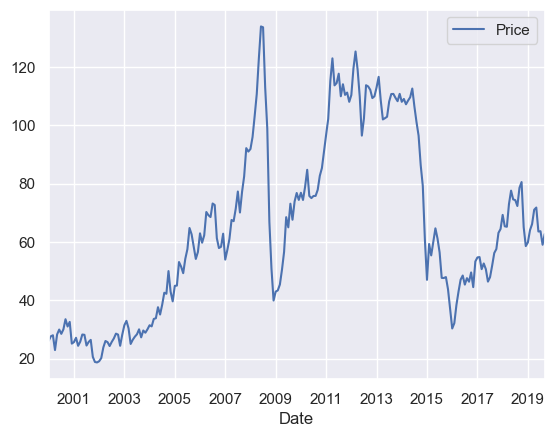

In [93]:
# many datapoints -> fewer and far between
brent.resample('ME').median().plot()

<Axes: xlabel='Date'>

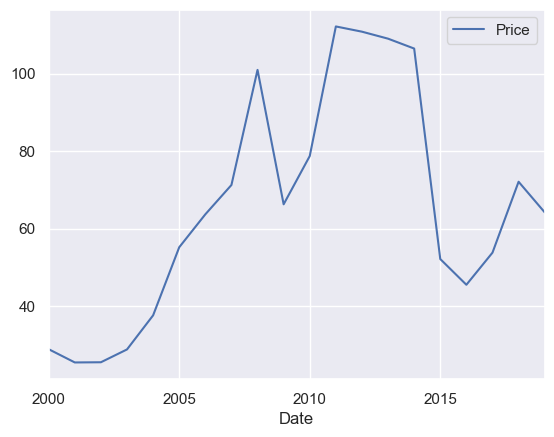

In [96]:
brent.resample('YE').median().plot()

In [98]:
brent.resample('YE').median().size

20

<Axes: xlabel='Date'>

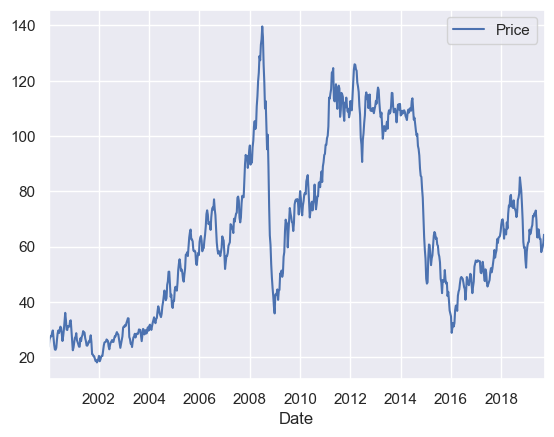

In [102]:
brent.resample('10D').median().plot()

#### 248. Upsampling And Interpolation

In [104]:
# resample frequency down -> downsample, eg. D(aily) -> M(onthly)
# resample frequency up -> upsample, eg. D(aily) -> H(ourly)

In [106]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [109]:
brent.resample('8h').mean()

,Price
Date,
2000-01-04 00:00:00,23.95
2000-01-04 08:00:00,NaN
2000-01-04 16:00:00,NaN
2000-01-05 00:00:00,23.72
2000-01-05 08:00:00,NaN
...,...
2019-09-28 16:00:00,NaN
2019-09-29 00:00:00,NaN
2019-09-29 08:00:00,NaN


##### linear interpolation

In [112]:
# ASIDE ===
# 23.95 N1 N2 23.72
diff = (23.72 - 23.95)/3
# key assumption in linear interpolation: distance are equal; the items are equally spaced
N1 = 23.95 + diff
print(N1)
N2 = N1 + diff
print(N2)
print(N2 + diff)
# ===END ASIDE

23.87333333333333
23.796666666666663
23.719999999999995


In [114]:
brent.resample('8h').interpolate(method='linear')

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.873333
2000-01-04 16:00:00,23.796667
2000-01-05 00:00:00,23.720000
2000-01-05 08:00:00,23.663333
...,...
2019-09-28 16:00:00,61.652222
2019-09-29 00:00:00,61.486667
2019-09-29 08:00:00,61.321111


In [118]:
brent.resample('8h').interpolate(method='spline',order=3)

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 08:00:00,23.013531
2000-01-04 16:00:00,23.117453
2000-01-05 00:00:00,23.720000
2000-01-05 08:00:00,23.319619
...,...
2019-09-28 16:00:00,61.240570
2019-09-29 00:00:00,61.195778
2019-09-29 08:00:00,61.176797


In [123]:
brent.resample('2h').interpolate(method='akima')

,Price
Date,
2000-01-04 00:00:00,23.950000
2000-01-04 02:00:00,23.928478
2000-01-04 04:00:00,23.907269
2000-01-04 06:00:00,23.886406
2000-01-04 08:00:00,23.865926
...,...
2019-09-29 16:00:00,61.289907
2019-09-29 18:00:00,61.217787
2019-09-29 20:00:00,61.143750


#### 249. What About asfreq()?

In [128]:
brent.asfreq('10D')

,Price
Date,
2000-01-04,23.95
2000-01-14,25.50
2000-01-24,27.02
2000-02-03,27.60
2000-02-13,NaN
...,...
2019-08-12,57.13
2019-08-22,59.81
2019-09-01,NaN


In [133]:
# To figure out what day of the week this specific date was.

# We can create a timestamp object and use the day name method on it.

# And sure enough, we get confirmation that it was a Sunday.

print('2000-02-13' in brent.index)
pd.Timestamp('2000-02-13').day_name()

False


'Sunday'

In [136]:
# Our forward filling logic takes takes the preceding price and puts it, copies it forward, so to speak.
brent.asfreq('10D',method='ffill')

,Price
Date,
2000-01-04,23.95
2000-01-14,25.50
2000-01-24,27.02
2000-02-03,27.60
2000-02-13,27.82
...,...
2019-08-12,57.13
2019-08-22,59.81
2019-09-01,61.04


In [139]:
brent.asfreq('10D',fill_value=brent.values.mean())

,Price
Date,
2000-01-04,23.950000
2000-01-14,25.500000
2000-01-24,27.020000
2000-02-03,27.600000
2000-02-13,64.358078
...,...
2019-08-12,57.130000
2019-08-22,59.810000
2019-09-01,64.358078


In [ ]:
# asfreq() -> resamples the data according to the frequency we spicigy, but it merely selects
# resemple -> like groupby with date-time capabilities 

# If we are only interested in selecting from our Time series according to some specific date frequency we use asfreq().

# If we need to apply more complicated operations like aggregation functions to our Resampled Time series,we use resample().

# Another way to think about it is if we need to select from our data frame, as in from a Time series, select a bunch of items according to a frequency we specify then we use asfreq().

# If we need to condense the information we have according to a frequency, we use resample().

#### 250. BONUS: Rolling Windows

In [141]:
brent.head()

,Price
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [144]:
# window size: 3
# aggfunc : mean()

print((brent.iloc[0] + brent.iloc[1] + brent.iloc[2]) / 3) # 1st in the window
print((brent.iloc[1] + brent.iloc[2] + brent.iloc[3]) / 3) # 2nd in the window

Price    23.74
dtype: float64
Price    23.54
dtype: float64


In [149]:
brent.rolling(3).mean()
# the first 3 observation have not a value because its a accumulative value

,Price
Date,
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,23.740000
2000-01-07,23.540000
2000-01-10,23.223333
...,...
2019-09-24,64.673333
2019-09-25,63.733333
2019-09-26,62.873333


In [151]:
#visualizing moving averages

Text(0, 0.5, 'Brent price(USD)')

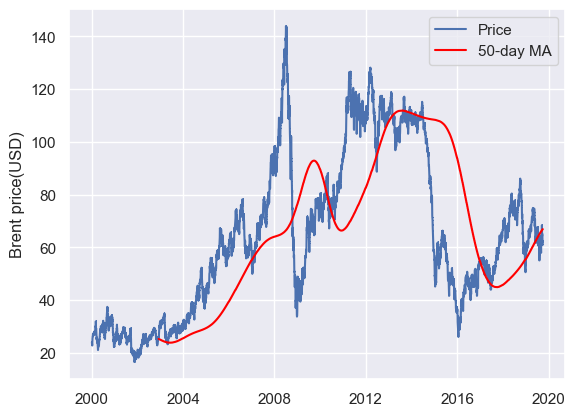

In [157]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.plot(brent, marker=',', label='Price')
ax.plot(brent.rolling(750, win_type='blackman').mean(), color='red', label= '50-day MA')

ax.legend()
ax.set_ylabel('Brent price(USD)')

#It seems like it's been on the uptrend throughout this period.

# So this was so this is what moving average is due to our series, to our time series.

# They smooth differences out and they do that by by taking a sample of data, applying an aggregate function,

# and therefore reducing the variability from one observation to another.

#### 251. Skill Challenge

##### 1. Add a new column (called Quarter) to the brent dataframe that contains each date´s respective calendar quarter, eg. 2000-01-04 would be 1

In [163]:
brent['Quarter'] = brent.index.quarter
brent.head()

,Price,Quarter
Date,,
2000-01-04,23.95,1
2000-01-05,23.72,1
2000-01-06,23.55,1
2000-01-07,23.35,1
2000-01-10,22.77,1


##### 2. Using the new Quarter column and the groupby() method, calculate the average price and standard deviation for each quarter of the year 2014

In [177]:
brent.loc['2014'].groupby('Quarter').agg(['mean','std'])

Price           
               mean        std
Quarter                       
1        108.141935   1.280641
2        109.694063   2.406442
3        101.899844   4.364868
4         76.429219  11.410171

In [203]:
brent.loc['2014'].groupby('Quarter').agg(average_price=('Price', 'mean'), std_price=('Price', 'std'))

,average_price,std_price
Quarter,,
1,108.141935,1.280641
2,109.694063,2.406442
3,101.899844,4.364868
4,76.429219,11.410171


##### 3. Reproduce the Price average and standard deviation output from Part 2 above, but this time using resample and without relying on the Quarter

In [186]:
brent.loc['2014','Price'].resample('QE').agg(['mean','std'])

,mean,std
Date,,
2014-03-31,108.141935,1.280641
2014-06-30,109.694063,2.406442
2014-09-30,101.899844,4.364868
2014-12-31,76.429219,11.410171


In [205]:
brent.loc['2014','Price'].resample('QE').agg(average_price ='mean',std_price ='std')

,average_price,std_price
Date,,
2014-03-31,108.141935,1.280641
2014-06-30,109.694063,2.406442
2014-09-30,101.899844,4.364868
2014-12-31,76.429219,11.410171
